In [2]:
import pandas as pd
from pysyncon import Dataprep, RobustSynth

In [3]:
df = pd.read_csv("../../data/basque.csv")

dataprep = Dataprep(
    foo=df,
    predictors=[
        "school.illit",
        "school.prim",
        "school.med",
        "school.high",
        "school.post.high",
        "invest",
    ],
    predictors_op="mean",
    time_predictors_prior=range(1964, 1970),
    special_predictors=[
        ("gdpcap", range(1960, 1970), "mean"),
        ("sec.agriculture", range(1961, 1970, 2), "mean"),
        ("sec.energy", range(1961, 1970, 2), "mean"),
        ("sec.industry", range(1961, 1970, 2), "mean"),
        ("sec.construction", range(1961, 1970, 2), "mean"),
        ("sec.services.venta", range(1961, 1970, 2), "mean"),
        ("sec.services.nonventa", range(1961, 1970, 2), "mean"),
        ("popdens", [1969], "mean"),
    ],
    dependent="gdpcap",
    unit_variable="regionname",
    time_variable="year",
    treatment_identifier="Basque Country (Pais Vasco)",
    controls_identifier=[
        "Aragon",
        "Baleares (Islas)",
        "Andalucia",
        "Canarias",
        "Cantabria",
        "Castilla Y Leon",
        "Castilla-La Mancha",
        "Cataluna",
        "Comunidad Valenciana",
        "Extremadura",
        "Galicia",
        "Madrid (Comunidad De)",
        "Murcia (Region de)",
        "Navarra (Comunidad Foral De)",
        "Principado De Asturias",
        "Rioja (La)",
    ],
    time_optimize_ssr=range(1960, 1970),
)

robust = RobustSynth()
robust.fit(dataprep, lambda_=0.1, sv_count=2)

In [4]:
robust.weights()

Aragon                          0.043
Baleares (Islas)                0.096
Andalucia                       0.055
Canarias                        0.029
Cantabria                       0.131
Castilla Y Leon                 0.005
Castilla-La Mancha             -0.024
Cataluna                        0.173
Comunidad Valenciana            0.099
Extremadura                    -0.025
Galicia                         0.000
Madrid (Comunidad De)           0.307
Murcia (Region de)              0.038
Navarra (Comunidad Foral De)    0.042
Principado De Asturias          0.145
Rioja (La)                      0.018
Name: weights, dtype: float64

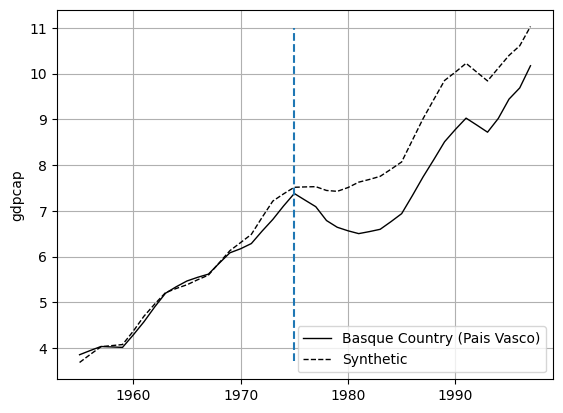

In [6]:
robust.path_plot(time_period=range(1955, 1998), treatment_time=1975)

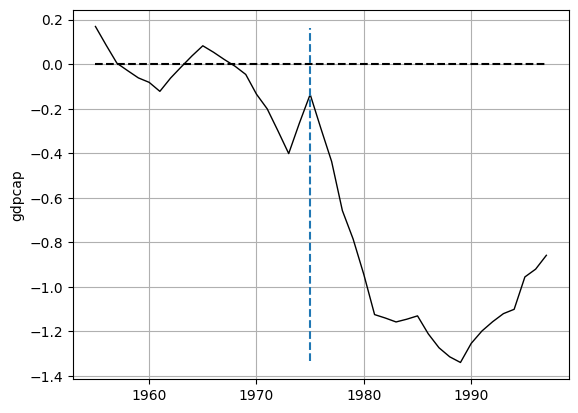

In [7]:
robust.gaps_plot(time_period=range(1955, 1998), treatment_time=1975)